In [1]:
from metadrive.envs.metadrive_env import MetaDriveEnv
from metadrive.component.map.base_map import BaseMap
from metadrive.component.map.pg_map import MapGenerateMethod
from metadrive.examples.ppo_expert.torch_expert import torch_expert as expert

import logging
from IPython.display import Image, clear_output
import pandas as pd
from pprint import pprint

from PIL import Image
import numpy as np

In [2]:
def create_env(seed=0):
    # ===== Termination Scheme =====
    termination_sceme = dict(
        out_of_route_done=False,
        on_continuous_line_done=False,
        crash_vehicle_done=True,
        crash_object_done=True,
        crash_human_done=True,
    )
    # ===== Map Config =====
    map_config = {
        BaseMap.GENERATE_TYPE: MapGenerateMethod.BIG_BLOCK_NUM,
        BaseMap.GENERATE_CONFIG: 3,  # 20 block
    }

    cfg = dict(
        # use_render=True,
        horizon=1000,  # figure out what do do aboutit
        record_episode=True,
        start_seed=seed,
        map_config=map_config,
        **termination_sceme
    )
    env = MetaDriveEnv(config=cfg)
    return env

In [3]:
def run_scenario(seed: int = 0):
    env = create_env(seed)
    _, step_info = env.reset(seed)

    while True:
        # get action from expert driving, or a dummy action
        action = expert(env.agent, deterministic=True)
        obs, reward, tm, tr, step_info = env.step(action)

        if tm or tr:
            break

    # save_map_data(env)
    env.close()

In [4]:
run_scenario(10)

[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.2.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.2.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 10, Num Scenarios : 1
[INFO] Use Torch PPO expert.
[INFO] Episode ended! Scenario Index: 10 Reason: arrive_dest.


In [5]:
env = create_env()
obs, step_info = env.reset(0)

[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.2.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.2.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 1


In [6]:
for step in range(5):

    # get action from expert driving, or a dummy action
    action = expert(env.agent, deterministic=True)
    obs, reward, tm, tr, step_info = env.step(action)

    if tm or tr:
        break

In [3]:
def save_map_data(env):
    semantic_map = env.current_map.get_semantic_map(env.current_map.get_center_point())
    semantic_map
    Image.fromarray((* 255).astype(np.uint8)).save("map.png")

In [12]:
semantic_map = env.current_map.get_semantic_map(env.current_map.get_center_point())
semantic_map = (semantic_map * 255).astype(np.uint8)
semantic_map[:].shape

(4096, 4096, 1)

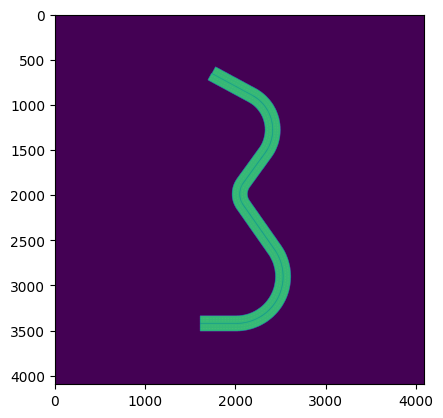

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(semantic_map)

In [ ]:
map = env.current_map
map_data = map.get_meta_data()
pprint(map_data)

{'block_sequence': [{'id': 'I', 'pre_block_socket_index': None},
                    {'angle': 125.06134796142578,
                     'dir': 1,
                     'id': 'C',
                     'length': 75.58282470703125,
                     'pre_block_socket_index': '0I-socket0',
                     'radius': 56.134971618652344},
                    {'angle': 71.0036392211914,
                     'dir': 0,
                     'id': 'C',
                     'length': 51.55717468261719,
                     'pre_block_socket_index': '1C-socket0',
                     'radius': 35.112525939941406},
                    {'angle': 97.54473876953125,
                     'dir': 1,
                     'id': 'C',
                     'length': 63.35321807861328,
                     'pre_block_socket_index': '2C-socket0',
                     'radius': 45.43406295776367}],
 'map_config': {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 3, 'exit_length': 50, 'seed':

In [ ]:
map.show_coordinates()